In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt


In [5]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

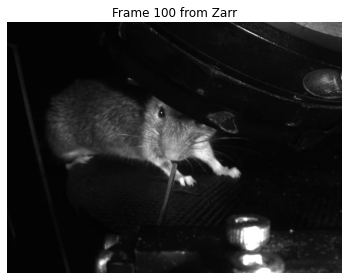

In [7]:

# Plot original frame
zarr_file = "/root/capsule/data/Thyme_736963_Face_Zarr/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/processed_frames_zarr"  # Change to your actual Zarr file path
zarr_data = zarr.open(zarr_file, mode='r')  # Open the Zarr file in read mode
zarr_data = zarr_data['data']
frame_index = 100  # Choose which frame to plot
frame = zarr_data[frame_index]  # Extract a single frame

plt.figure(figsize=(6, 6))
plt.imshow(frame, cmap='gray')  # Adjust cmap if needed
plt.title(f"Frame {frame_index} from Zarr")
plt.axis("off")
plt.show()


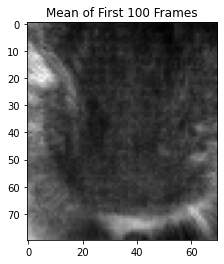

In [27]:
# plot mean of 100 motion ener4gy frames
zarr_file = "/root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/motion_energy_frames.zarr/cropped_data"
zarr_data = zarr.open(zarr_file, mode='r')

# Define the number of frames to average
num_frames = 100
num_available_frames = min(num_frames, zarr_data.shape[0])  # Ensure we don't exceed available frames

# Compute the mean of the selected frames
mean_frame = np.mean(zarr_data[1:num_available_frames+1], axis=0)

# Plot the mean frame
plt.figure()
plt.imshow(mean_frame, cmap='gray')  # Adjust colormap as needed
plt.title(f"Mean of First {num_available_frames} Frames")
plt.show()

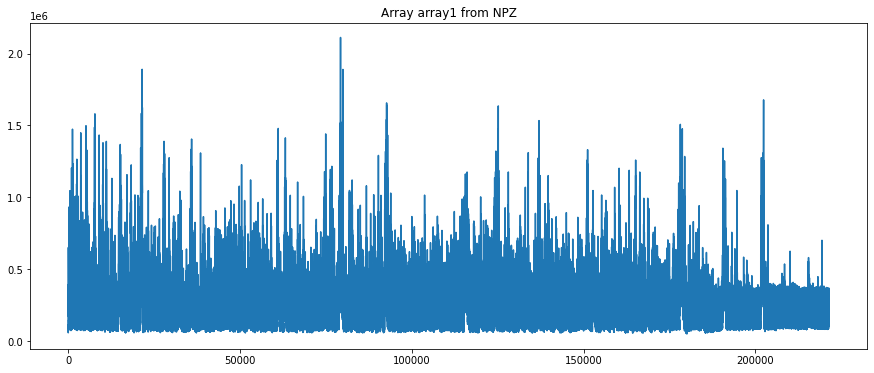

In [28]:

# Load and plot a NumPy array from an NPZ file
npz_file = "/root/capsule/data/Thyme_736963_Face_zarr_motion_energy/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae/736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae.npz"  # Change to your actual NPZ file path
npz_data = np.load(npz_file)  # Load the NPZ file

# Assuming the NPZ file contains a single array, extract it
array_name = list(npz_data.keys())[0]  # Get the first array name
array = npz_data[array_name]  # Extract the array
plt.figure(figsize=(15, 6))
plt.plot(array[1:])  # Adjust cmap if needed
plt.title(f"Array {array_name} from NPZ")
plt.show()


In [35]:

# Define the base directory
base_dir = "/root/capsule/data/Thyme_736963_Face_zarr_motion_energy"

# Loop through subdirectories
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    
    if not os.path.isdir(folder_path):
        continue  # Skip if not a directory

    # Find .zarr and .npz files
    zarr_files = [f for f in os.listdir(folder_path) if f.endswith(".zarr")]
    npz_files = [f for f in os.listdir(folder_path) if f.endswith(".npz")]

    if not zarr_files or not npz_files:
        continue  # Skip if the folder doesn't have both file types

    print(f"Processing folder: {folder}")

    # Create a directory for plots
    plots_dir = os.path.join("/root/capsule/scratch", "plots")
    os.makedirs(plots_dir, exist_ok=True)

    # Process Zarr file (assumes one per folder)
    zarr_path = os.path.join(folder_path, zarr_files[0])
    zarr_data = zarr.open(zarr_path, mode='r')
    zarr_data = zarr_data['data']

    num_frames = min(100, zarr_data.shape[0])  # Ensure we don't exceed available frames
    mean_frame = np.mean(zarr_data[1:num_frames], axis=0)

    # Save mean frame plot
    plt.figure(figsize=(6, 6))
    plt.imshow(mean_frame, cmap='gray')  # Adjust colormap if needed
    plt.title(f"Mean of First {num_frames} Frames")
    mean_frame_path = os.path.join(plots_dir, f"{folder}_mean_frame.png")
    plt.savefig(mean_frame_path, dpi=300)


    # Process NPZ file (assumes one per folder)
    npz_path = os.path.join(folder_path, npz_files[0])
    npz_data = np.load(npz_path)

    # Select the first array in the NPZ file
    array_name = list(npz_data.keys())[0]
    array = npz_data[array_name]

    # Plot a trace (assuming it's a 1D time-series like signal data)
    plt.figure(figsize=(12, 4))
    plt.plot(array[1:], linewidth=1)
    plt.title(f"Trace of {array_name}")
    plt.xlabel("Index")
    plt.ylabel("Value")
    trace_plot_path = os.path.join(plots_dir, f"{folder}_trace_plot.png")
    plt.savefig(trace_plot_path, dpi=300)


    print(f"Saved plots to: {plots_dir}")

print("Processing complete.")

Processing folder: 736963_Face_1a721702-ba3b-444d-93a9-88fab9563dae
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_86affd31-6248-4674-9dc2-333c1954281e
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_a0f9dac8-36cc-42b4-a9de-5a4f4167aecd
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_77436158-af44-44bd-92ce-ba3d2a94abeb
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_49ad4944-44fe-4a87-9c0d-affb2839c58b
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_12592716-8311-4b4f-8874-f544a2f473f8
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_85253b80-3cd8-4eec-b58d-2773e2b2a5bd
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_3837aa50-1862-4711-9213-46f2a79d51b9
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_e1921cd6-866e-401d-b4a9-be827953caef
Saved plots to: /root/capsule/scratc

<ipython-input-35-b0880c6add95>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6, 6))


Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_7615b3aa-3276-4913-8ab2-56572de80f9c
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_a298794e-0b47-4414-b354-107b43e0f0da
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_2f8c309b-7fae-467d-9894-06d83ac1bbe0
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_c08045d7-3c52-4546-bec5-5f9ee63e5d4c
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_4084b35a-ef15-402e-8ea2-44fbd0e086a1
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_1917eff5-8bfd-45a8-9f3e-2ca776910a2d
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_f40cc9c6-770b-4572-a6a2-56fba389c8be
Saved plots to: /root/capsule/scratch/plots
Processing folder: 736963_Face_f656588d-4d12-488e-baca-3b2f379be6bb
